## Documentation

- https://towardsdatascience.com/how-to-select-the-best-number-of-principal-components-for-the-dataset-287e64b14c6d
- https://towardsdatascience.com/gmm-gaussian-mixture-models-how-to-successfully-use-it-to-cluster-your-data-891dc8ac058f
- https://www.astroml.org/astroML-notebooks/chapter6/astroml_chapter6_Gaussian_Mixture_Models.html
- https://jakevdp.github.io/PythonDataScienceHandbook/05.12-gaussian-mixtures.html
- https://napsterinblue.github.io/notes/machine_learning/unsupervised/basic_evaluation_metrics/
- https://towardsdatascience.com/how-to-select-the-best-number-of-principal-components-for-the-dataset-287e64b14c6d
- https://stats.stackexchange.com/questions/564655/pca-as-pre-processing-before-clustering-through-gmm
- https://machinelearningparatodos.com/segmentacion-utilizando-k-means-en-python/
- https://www.analyticsvidhya.com/blog/2021/05/k-mean-getting-the-optimal-number-of-clusters/
- https://gist.github.com/SolClover/b743b226fd2d7e1ffc8cfe66671f32fd

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import numpy as np

In [2]:
df = pd.read_csv('../dataset/freyfaces.csv')

In [3]:
df.shape

(1965, 562)

In [4]:
df.shape

(1965, 562)

In [5]:
df_img = df.iloc[:, 1:-1]
df_img.head()

px1  px2  px3  px4  px5  px6  px7  px8  px9  px10  ...  px551  px552  \
0   81  136  167  185  187  193  203  222  224   226  ...    124    131   
1   85  138  165  184  187  193  203  223  225   225  ...    108    109   
2   87  139  166  185  187  194  205  223  224   225  ...    112    117   
3   80  145  171  184  189  192  207  224  224   224  ...    121    128   
4   99  132  162  182  185  193  200  220  224   224  ...    118    130   

   px553  px554  px555  px556  px557  px558  px559  px560  
0    140    144    147    133    133    152    158    164  
1    114    122    128    126    138    167    178    184  
2    121    132    130    126    141    172    177    183  
3    130    135    136    126    132    164    157    164  
4    133    144    140    129    133    145    112    118  

[5 rows x 560 columns]

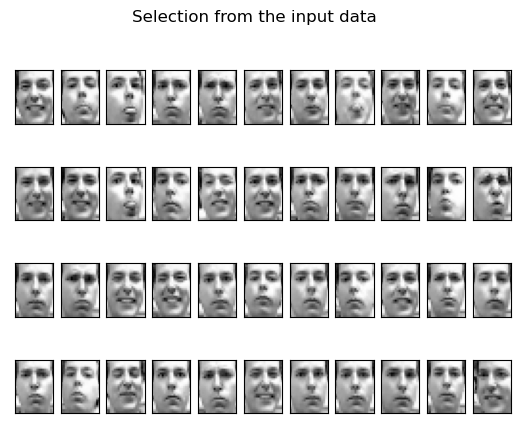

In [6]:
fig, ax = plt.subplots(4, 11, subplot_kw = dict(xticks=[], yticks=[]))
fig.suptitle("Selection from the input data")
for j in range(11):
    for i in range(4):
        z = np.random.randint(0, df_img.shape[0])
        im = ax[i, j].imshow(df_img.iloc[z, :].to_numpy().astype('float').reshape((28, 20)), cmap = plt.cm.gray)

## PCA (Principal component analyisis)

We have many dimensions in our dataset, so we can apply pca to reduce the dimensions and maintain the highest possible quality.

In [7]:
from sklearn.neighbors import KernelDensity
from sklearn.decomposition import PCA

In [8]:
pca = PCA(n_components=0.95, whiten = False)
data = pca.fit_transform(df_img)
explained_variance = pca.explained_variance_ratio_
pca.n_components_

80

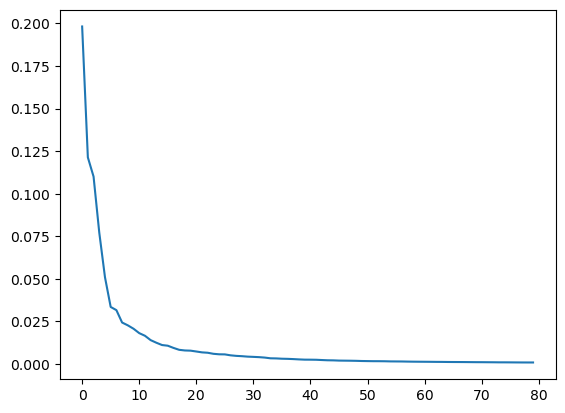

In [9]:
plt.plot(explained_variance)

We can reduce more dimensions but for the moment I want to keep a good quality for the images.

### Sampling data

In [10]:
from sklearn.neighbors import KernelDensity

In [11]:
kde = KernelDensity(kernel = 'gaussian', bandwidth = 8).fit(data)

In [12]:
new_data = kde.sample(1200, random_state=0)
new_data.shape

(1200, 80)

In [13]:
new_data = pca.inverse_transform(new_data)

In [14]:
def show_images (X, target=None) :   
    fig, ax = plt.subplots(4, 11, subplot_kw = dict(xticks=[], yticks=[]))
    fig.suptitle("Resampled data")
    for j in range(11):
        for i in range(4):
            z = np.random.randint(0, X.shape[0])
            im = ax[i, j].imshow(
                X[z].reshape((28, 20)), interpolation = "nearest", cmap = plt.cm.gray
            )
            im.set_clim(0, 256)
            if target is not None : 
                ax[i, j].set_title(target[z])

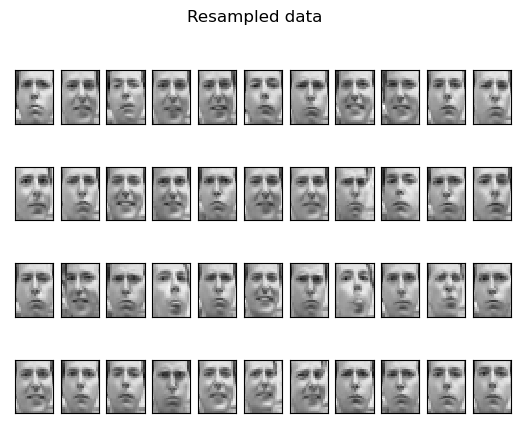

In [15]:
show_images(new_data)

### GMM

In [16]:
from sklearn.mixture import GaussianMixture
from scipy.optimize import linear_sum_assignment
from sklearn.model_selection import train_test_split
from sklearn import metrics 
from sklearn.metrics import silhouette_score, silhouette_samples
import copy

In [17]:
# train, test = train_test_split(new_data, test_size=0.2)

In [18]:
data.shape

(1965, 80)

In [19]:
gmm_X = copy.deepcopy(data)

#### Potential values for GMM

We will apply the Silhouette score, the BIC and the AIC to assess whether the gmm model is a good model for this data set.

##### Silhouette score

In [20]:
def compute_silhouette_score(X, K) :
    S=[]
    for k in K:
        # Set the model and its parameters
        model = GaussianMixture(n_components=k, n_init=20, init_params='kmeans')
        # Fit the model 
        labels = model.fit_predict(X)
        # Calculate Silhoutte Score and append to a list
        S.append(metrics.silhouette_score(X, labels, metric='euclidean'))
    return (S, K)

In [21]:
S, n_components_SSORE = compute_silhouette_score(gmm_X, range(2,10))

In [22]:
plt.figure(figsize=(16,8), dpi=300)
plt.plot(n_components_SSORE, S, 'bo-')
plt.xlabel('k')
plt.ylabel('Silhouette Score')
plt.title('Identify the number of clusters using Silhouette Score')
plt.show()

In [23]:
class CloudPlot () :    

    def cloud_plot_2d (n_components, model) :    
        fig, ax = plt.subplots(figsize=(10, 5))
        y = GaussianMixture(n_components).fit_predict(model)
        plt.scatter(model[:, 0], model[:, 1], c=y);
        
    
    def cloud_plot_3d (n_components, model) :
        fig = plt.figure(figsize=(8, 8))
        ax = fig.add_subplot(projection='3d')

        y = GaussianMixture(n_components).fit_predict(model)
        plt.scatter(model[:, 1], model[:, 0], model[:, 2], c=y);

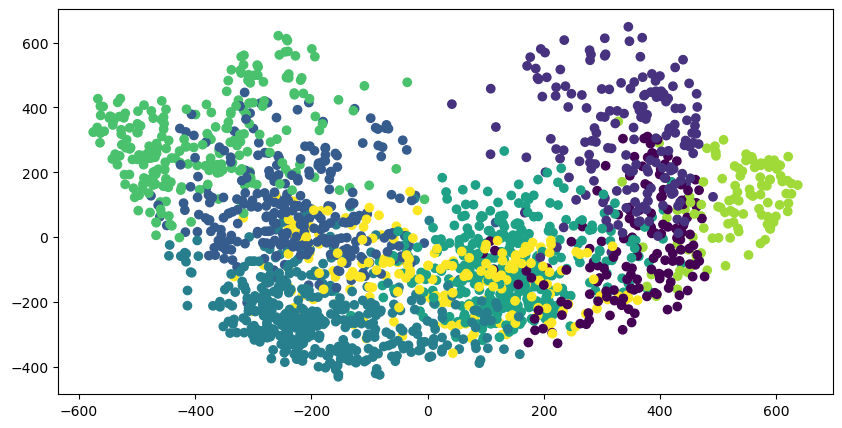

In [24]:
CloudPlot.cloud_plot_2d(8, gmm_X)

/home/bangal/miniconda3/envs/IA/lib/python3.9/site-packages/matplotlib/collections.py:981: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


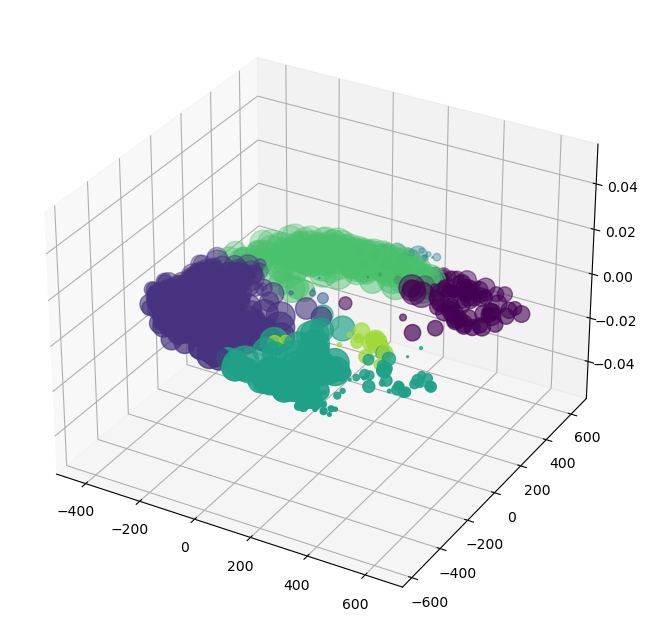

In [25]:
CloudPlot.cloud_plot_3d(8, gmm_X)

The graph indicates that the recommended clusters are 9 but if we look at the Silhouette score we realize that we reach 0.176 or so with cluster = 9. This means that between clusters there is a certain separation although there may be overlapping or clusters may be very close to each other. In general it is recommended to have a value higher than 0.5 as it indicates that there is a good separation between clusters. LOOKS BAD

##### Bayesian information criterion (BIC) and Akaike Information Criterion (AIC)

In [26]:
def compute_bayesian_information_criterion (N, X, covariance_type='full', max_iter=1000):
    models = [None for n in N]
    for i in range(len(N)):
        models[i] = GaussianMixture(n_components=N[i], max_iter=max_iter, covariance_type=covariance_type)
        models[i].fit(X)
    return models, N

In [27]:
models, n_components_BIC_AIC = compute_bayesian_information_criterion(np.arange(2,10), gmm_X)

In [28]:
BIC = [m.bic(gmm_X) for m in models]
AIC = [m.aic(gmm_X) for m in models]

In [29]:
i_best = np.argmin(BIC)
gmm_best = models[i_best]
print("best fit converged:", gmm_best.converged_)
print("BIC: n_components =  %i" % n_components_BIC_AIC[i_best])

best fit converged: True
BIC: n_components =  4


In [30]:
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(111)
ax.plot(n_components_BIC_AIC, AIC, '-k', label='AIC')
ax.plot(n_components_BIC_AIC, BIC, ':k', label='BIC')
ax.legend(loc=1)
ax.set_xlabel('N components')
# plt.setp(ax.get_yticklabels(), fontsize=7)

Text(0.5, 0, 'N components')

In [31]:
CloudPlot.cloud_plot_2d(4, gmm_X)

/home/bangal/miniconda3/envs/IA/lib/python3.9/site-packages/matplotlib/collections.py:981: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


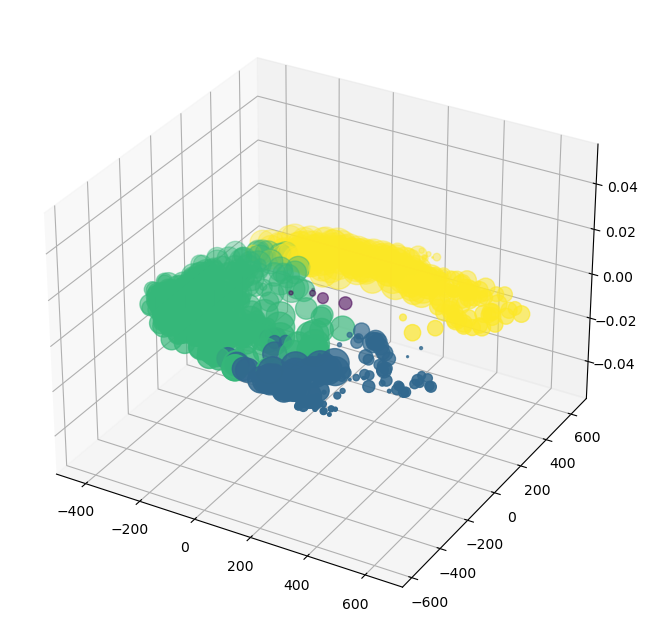

In [32]:
CloudPlot.cloud_plot_3d(4, gmm_X)

In general when applying the BIC and AIC method, a lower value indicates a better model, in this case we have 4 clusters as a result. LOOKS BETTER

### K-means

In [33]:
from sklearn.cluster import KMeans 
import copy

In [34]:
km_copy = copy.deepcopy(data)
kmeans_X = (km_copy - km_copy.mean()) / km_copy.std()

#### Elbow Method

In [35]:
def elbow_method (clusters_range, X) :
    return [ KMeans(n_clusters=k, random_state = 8888).fit(X).inertia_ for k in clusters_range]

In [36]:
inertias = elbow_method(range(1,11), kmeans_X)

In [37]:
inertias

[157200.00000000003,
 132040.2077091179,
 119406.1789477605,
 107340.4325270521,
 101682.37691985174,
 96619.62115132857,
 91298.09577606518,
 88434.6825516405,
 84595.9186086264,
 82199.67668984727]

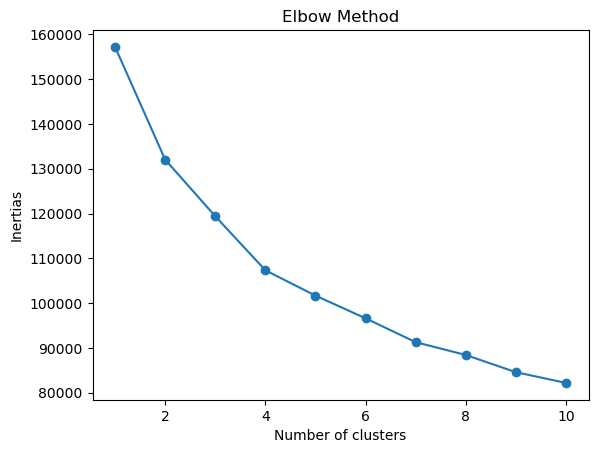

In [38]:
plt.plot(range(1, 11), inertias, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertias')
plt.title('Elbow Method')
plt.show()

We can see that we do not have in the graph any element that makes a sufficiently pronounced "elbow" for us to say that the optimal number of clusters is X. So let's try another method to find out the optimal number of centroids.

#### Silhouette method

In [39]:
def silhouette_method(clusters_range, X) :
    silhouettes = []
    for k in clusters_range :
        kmeans = KMeans(n_clusters=k, random_state=0).fit(X)
        silhouette_avg = silhouette_score(X, kmeans.labels_)
        silhouettes.append(silhouette_avg)
#         print(kmeans.labels_)
    return silhouettes

In [40]:
silhouettes = silhouette_method(range(2,11), kmeans_X)

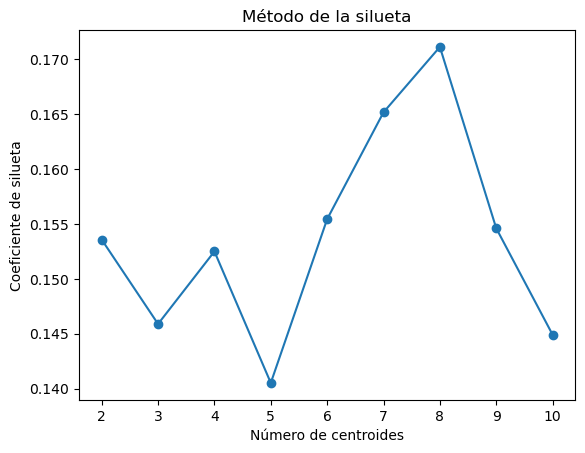

In [41]:
plt.plot(range(2, 11), silhouettes, marker='o')
plt.xlabel('Número de centroides')
plt.ylabel('Coeficiente de silueta')
plt.title('Método de la silueta')
plt.show()

In [42]:
CloudPlot.cloud_plot_2d(8, kmeans_X)

With the silhouette method it gives us that the optimal clusters are 8, but if we look at the y-axis, the max value of the y-axis is 0.180. This may mean that the clusters are not well defined or that the clusters are too close together.

#### Model

In [43]:
gm = GaussianMixture(n_components = 4, random_state = 0).fit(gmm_X)

In [44]:
gm_Ysoft = gm.predict_proba(gmm_X)

In [45]:
gm_Yhard = np.argmax(gm_Ysoft, axis = 1) 

In [46]:
gm_img = pca.inverse_transform(gmm_X)

In [47]:
show_images(gm_img, gm_Yhard)

In [48]:
km_img = pca.inverse_transform(km_copy)
km_img.shape

(1965, 560)

In [49]:
km_hard = KMeans(4).fit_predict(km_copy)

In [50]:
km_hard

array([1, 1, 1, ..., 1, 0, 1], dtype=int32)

In [51]:
show_images(km_img, km_hard)

To check if the model works 100%, we can make plots by category for each model.

In [52]:
def show_images_by_category (X, target=None, category=1) :   
    fig, ax = plt.subplots(3, 9, subplot_kw = dict(xticks=[], yticks=[]))
    fig.suptitle("Resampled data")
    cat = np.where(target == category)[0]
#     z = 1
    for j in range(9):
        for i in range(3):
            z = np.random.randint(1, len(cat))
            index = cat[z-1:z]
            im = ax[i, j].imshow(
                X[index].reshape((28, 20)), interpolation = "nearest", cmap = plt.cm.gray
            )
            im.set_clim(0, 256)
            if target is not None : 
                ax[i, j].set_title(target[index])
            z += 1

### GMM

/home/bangal/miniconda3/envs/IA/lib/python3.9/site-packages/matplotlib/text.py:1223: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


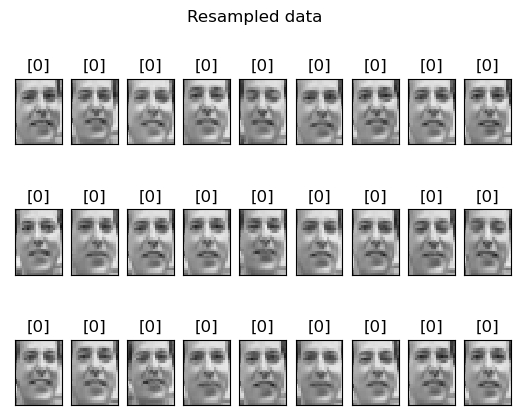

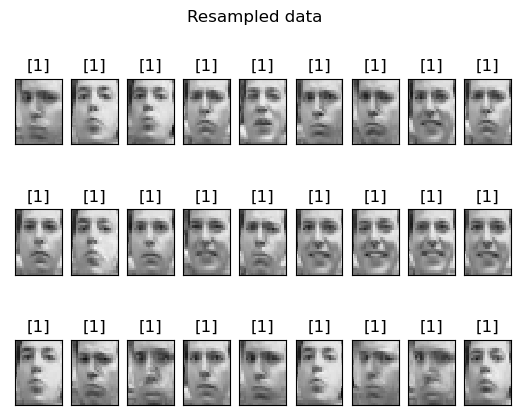

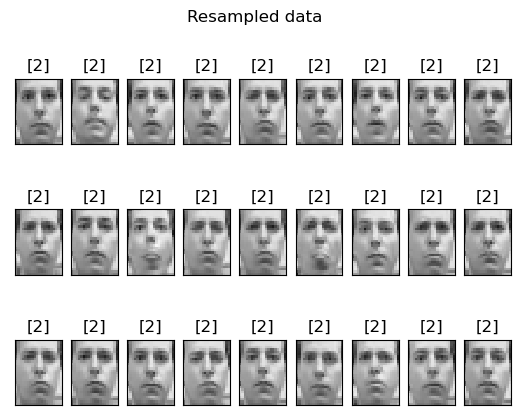

In [53]:
show_images_by_category(gm_img, gm_Yhard, 0)
show_images_by_category(gm_img, gm_Yhard, 1)
show_images_by_category(gm_img, gm_Yhard, 2)
show_images_by_category(gm_img, gm_Yhard, 3)

### K-Means

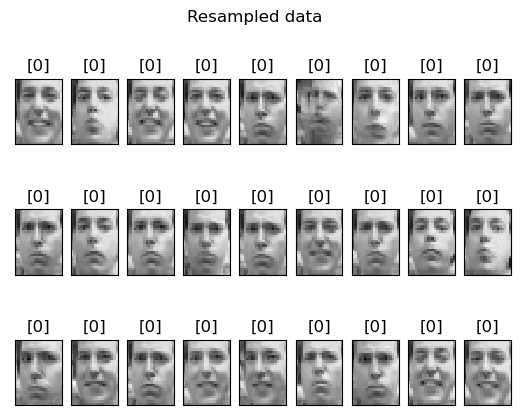

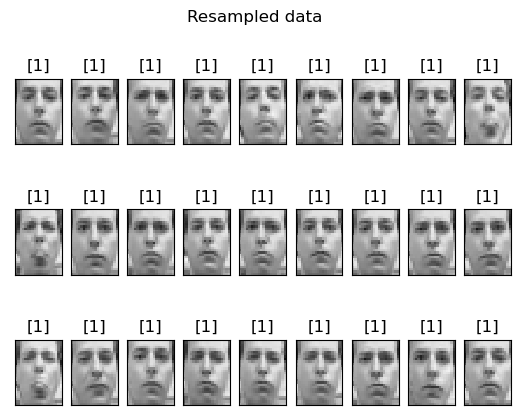

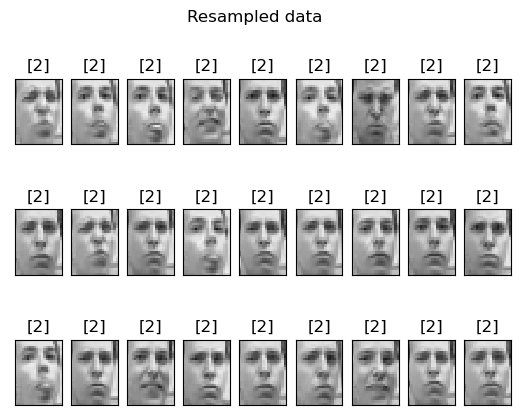

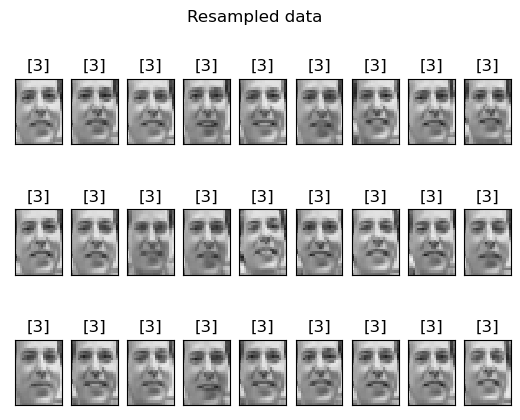

In [54]:
show_images_by_category(km_img, km_hard, 0)
show_images_by_category(km_img, km_hard, 1)
show_images_by_category(km_img, km_hard, 2)
show_images_by_category(km_img, km_hard, 3)